<font size="6"> **1-Uploading file** </font>

In [1]:
# Import modules
import pandas as pd
import numpy as np

# Read in dataset
data = pd.read_csv("/kaggle/input/bank-debt-data/bank_data.csv")

# Print the first few rows of the DataFrame
data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


<font size="6"> **2-Graphical exploratory data analysis** </font>

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='expected_recovery_amount', ylabel='age'>

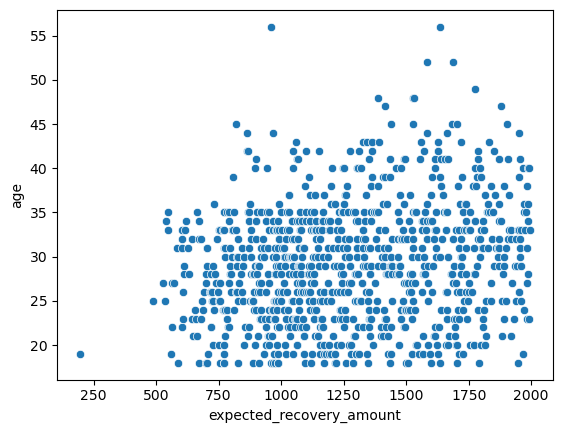

In [2]:
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
subset=data.loc[data['expected_recovery_amount'] <=2000]
sns.scatterplot(x=subset['expected_recovery_amount'], y=subset['age'])



<font size="3">This did not show an obvious jump around $1000. <font size>

<font size="6"> **3-Statistical test: age vs. expected recovery amount** </font>

In [3]:
from scipy import stats
subset2=data.loc[(data['expected_recovery_amount'] >=900 )& (data['expected_recovery_amount'] <=1100)]
#calculating the mean manually
groups=subset2.groupby(['recovery_strategy'])
print(groups['age'].mean())
#splitting them in 2 groups
group0= subset2.loc[data['recovery_strategy']=="Level 0 Recovery"]['age']
group1= subset2.loc[data['recovery_strategy']=="Level 1 Recovery"]['age']
stats.kruskal(group0,group1)

recovery_strategy
Level 0 Recovery    27.224719
Level 1 Recovery    28.684211
Name: age, dtype: float64


KruskalResult(statistic=3.1513987711538896, pvalue=0.07586190694799404)

<font size="3">This did not show significant difference around $1000 as pvalue more than 0.05 <font size>

<font size="6"> **4-Statistical test: sex vs. expected recovery amount** </font>

In [4]:
from scipy.stats import chi2_contingency
#we will test using chi-square test
# Create a new column for binning the expected recovery amount
subset3=subset2.copy()
subset3['recovery_amount_bin'] = ''
subset3.loc[subset3['expected_recovery_amount'] < 1000, 'recovery_amount_bin'] = '<1000'
subset3.loc[subset3['expected_recovery_amount'] >= 1000, 'recovery_amount_bin'] = '>=1000'

# Create a contingency table of recovery amount bin and gender
contingency_table = pd.crosstab(subset3['recovery_amount_bin'], subset3['sex'])

# Perform chi-square test of independence 
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"P-value: {p_value}")

P-value: 0.5585016756410321


<font size="3">This did not show significant difference around $1000 as pvalue more than 0.05 <font size>

<font size="6"> **5-Exploratory graphical analysis: recovery amount** </font>

<Axes: xlabel='actual_recovery_amount', ylabel='expected_recovery_amount'>

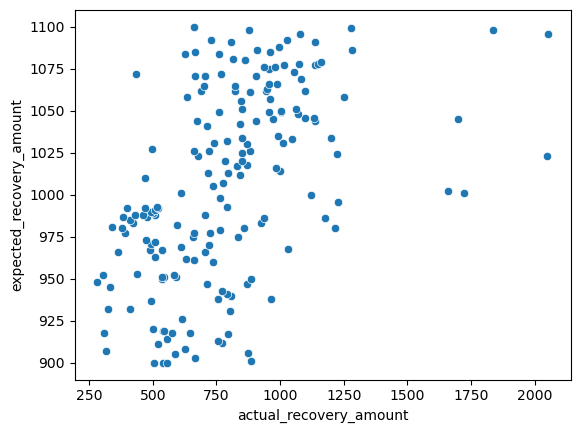

In [7]:
sns.scatterplot(x=subset2['actual_recovery_amount'], y=subset2['expected_recovery_amount'])


<font size="6"> **6-Exploratory graphical analysis: recovery amount** </font>

In [6]:
# Compute average actual recovery amount just below and above the threshold
groups['actual_recovery_amount'].mean()

subset4=data.loc[(data['expected_recovery_amount'] >=950 )& (data['expected_recovery_amount'] <=1050)]

group0= subset2.loc[data['recovery_strategy']=="Level 0 Recovery"]['actual_recovery_amount']
group1= subset2.loc[data['recovery_strategy']=="Level 1 Recovery"]['actual_recovery_amount']
stats.kruskal(group0,group1)

group0= subset4.loc[data['recovery_strategy']=="Level 0 Recovery"]['actual_recovery_amount']
group1= subset4.loc[data['recovery_strategy']=="Level 1 Recovery"]['actual_recovery_amount']
stats.kruskal(group0,group1)

KruskalResult(statistic=30.9924872487249, pvalue=2.5902913533269003e-08)

<font size="6"> **7-Regression modeling: no threshold** </font>

In [10]:
import statsmodels.api as sm
# Define the input and output variables
X = subset2['expected_recovery_amount']
y = subset2['actual_recovery_amount']

# Add a constant term to the input variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# Print the summary of the regression results
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           3.65e-13
Time:                            21:46:07   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

<font size="6"> **8-Regression modeling: adding true threshold** </font>

In [18]:
# Create the indicator variable
threshold = 1000
subset5=subset2.copy()
subset5['Above Threshold'] = (subset5['expected_recovery_amount'] >= threshold).astype(int)
# Define X and y
X = subset5[['expected_recovery_amount','Above Threshold']]
y = subset5['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.309
Model:                                OLS   Adj. R-squared:                  0.301
Method:                     Least Squares   F-statistic:                     40.43
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           3.06e-15
Time:                            23:46:43   Log-Likelihood:                -1279.3
No. Observations:                     184   AIC:                             2565.
Df Residuals:                         181   BIC:                             2574.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       98.8272    622.659      0.159      0.874   -1129.777    1327.431
expected_recovery_amount     0.5430      0.651      0.834      0.406      -0.742       1.828
Above Threshold            284.0296     73.988      3.839      0.000     138.041     430.019
==============================================================================
Omnibus:                       66.386   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.158
Skew:                           1.512   Prob(JB):                     1.39e-41
Kurtosis:                       6.924   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font size="6"> **9-Regression modeling: adjusting the window** </font>

In [19]:
# Create the indicator variable
threshold = 1000
subset6=subset4.copy()
subset6['Above Threshold'] = (subset6['expected_recovery_amount'] >= threshold).astype(int)
# Define X and y
X = subset6[['expected_recovery_amount','Above Threshold']]
y = subset6['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.287
Model:                                OLS   Adj. R-squared:                  0.273
Method:                     Least Squares   F-statistic:                     19.55
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           7.33e-08
Time:                            23:47:32   Log-Likelihood:                -699.42
No. Observations:                     100   AIC:                             1405.
Df Residuals:                          97   BIC:                             1413.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -310.8225   1808.751     -0.172      0.864   -3900.692    3279.047
expected_recovery_amount     0.9510      1.854      0.513      0.609      -2.728       4.630
Above Threshold            285.5160    110.391      2.586      0.011      66.421     504.611
==============================================================================
Omnibus:                       39.881   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.700
Skew:                           1.568   Prob(JB):                     4.05e-19
Kurtosis:                       6.239   Cond. No.                     6.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""